In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing dataset into Pandas dataframe
df=pd.read_csv('/content/browser_rankings_data.csv') #provide your file path here

In [4]:
df.shape

(3066, 10)

In [5]:
df.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


16 Entries have no Rank value 

In [7]:
#Removing rows with Nan values for Rank
df=df.dropna()

In [8]:
df.shape

(3050, 10)

EDA 1: Correlation between Long Description Length and Rank

In [9]:
def get_length(long_desc):   #function to get length of long description
  return(len(long_desc.split(' ')))
df['long_desc_length']=df['Long Description'].apply(get_length)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

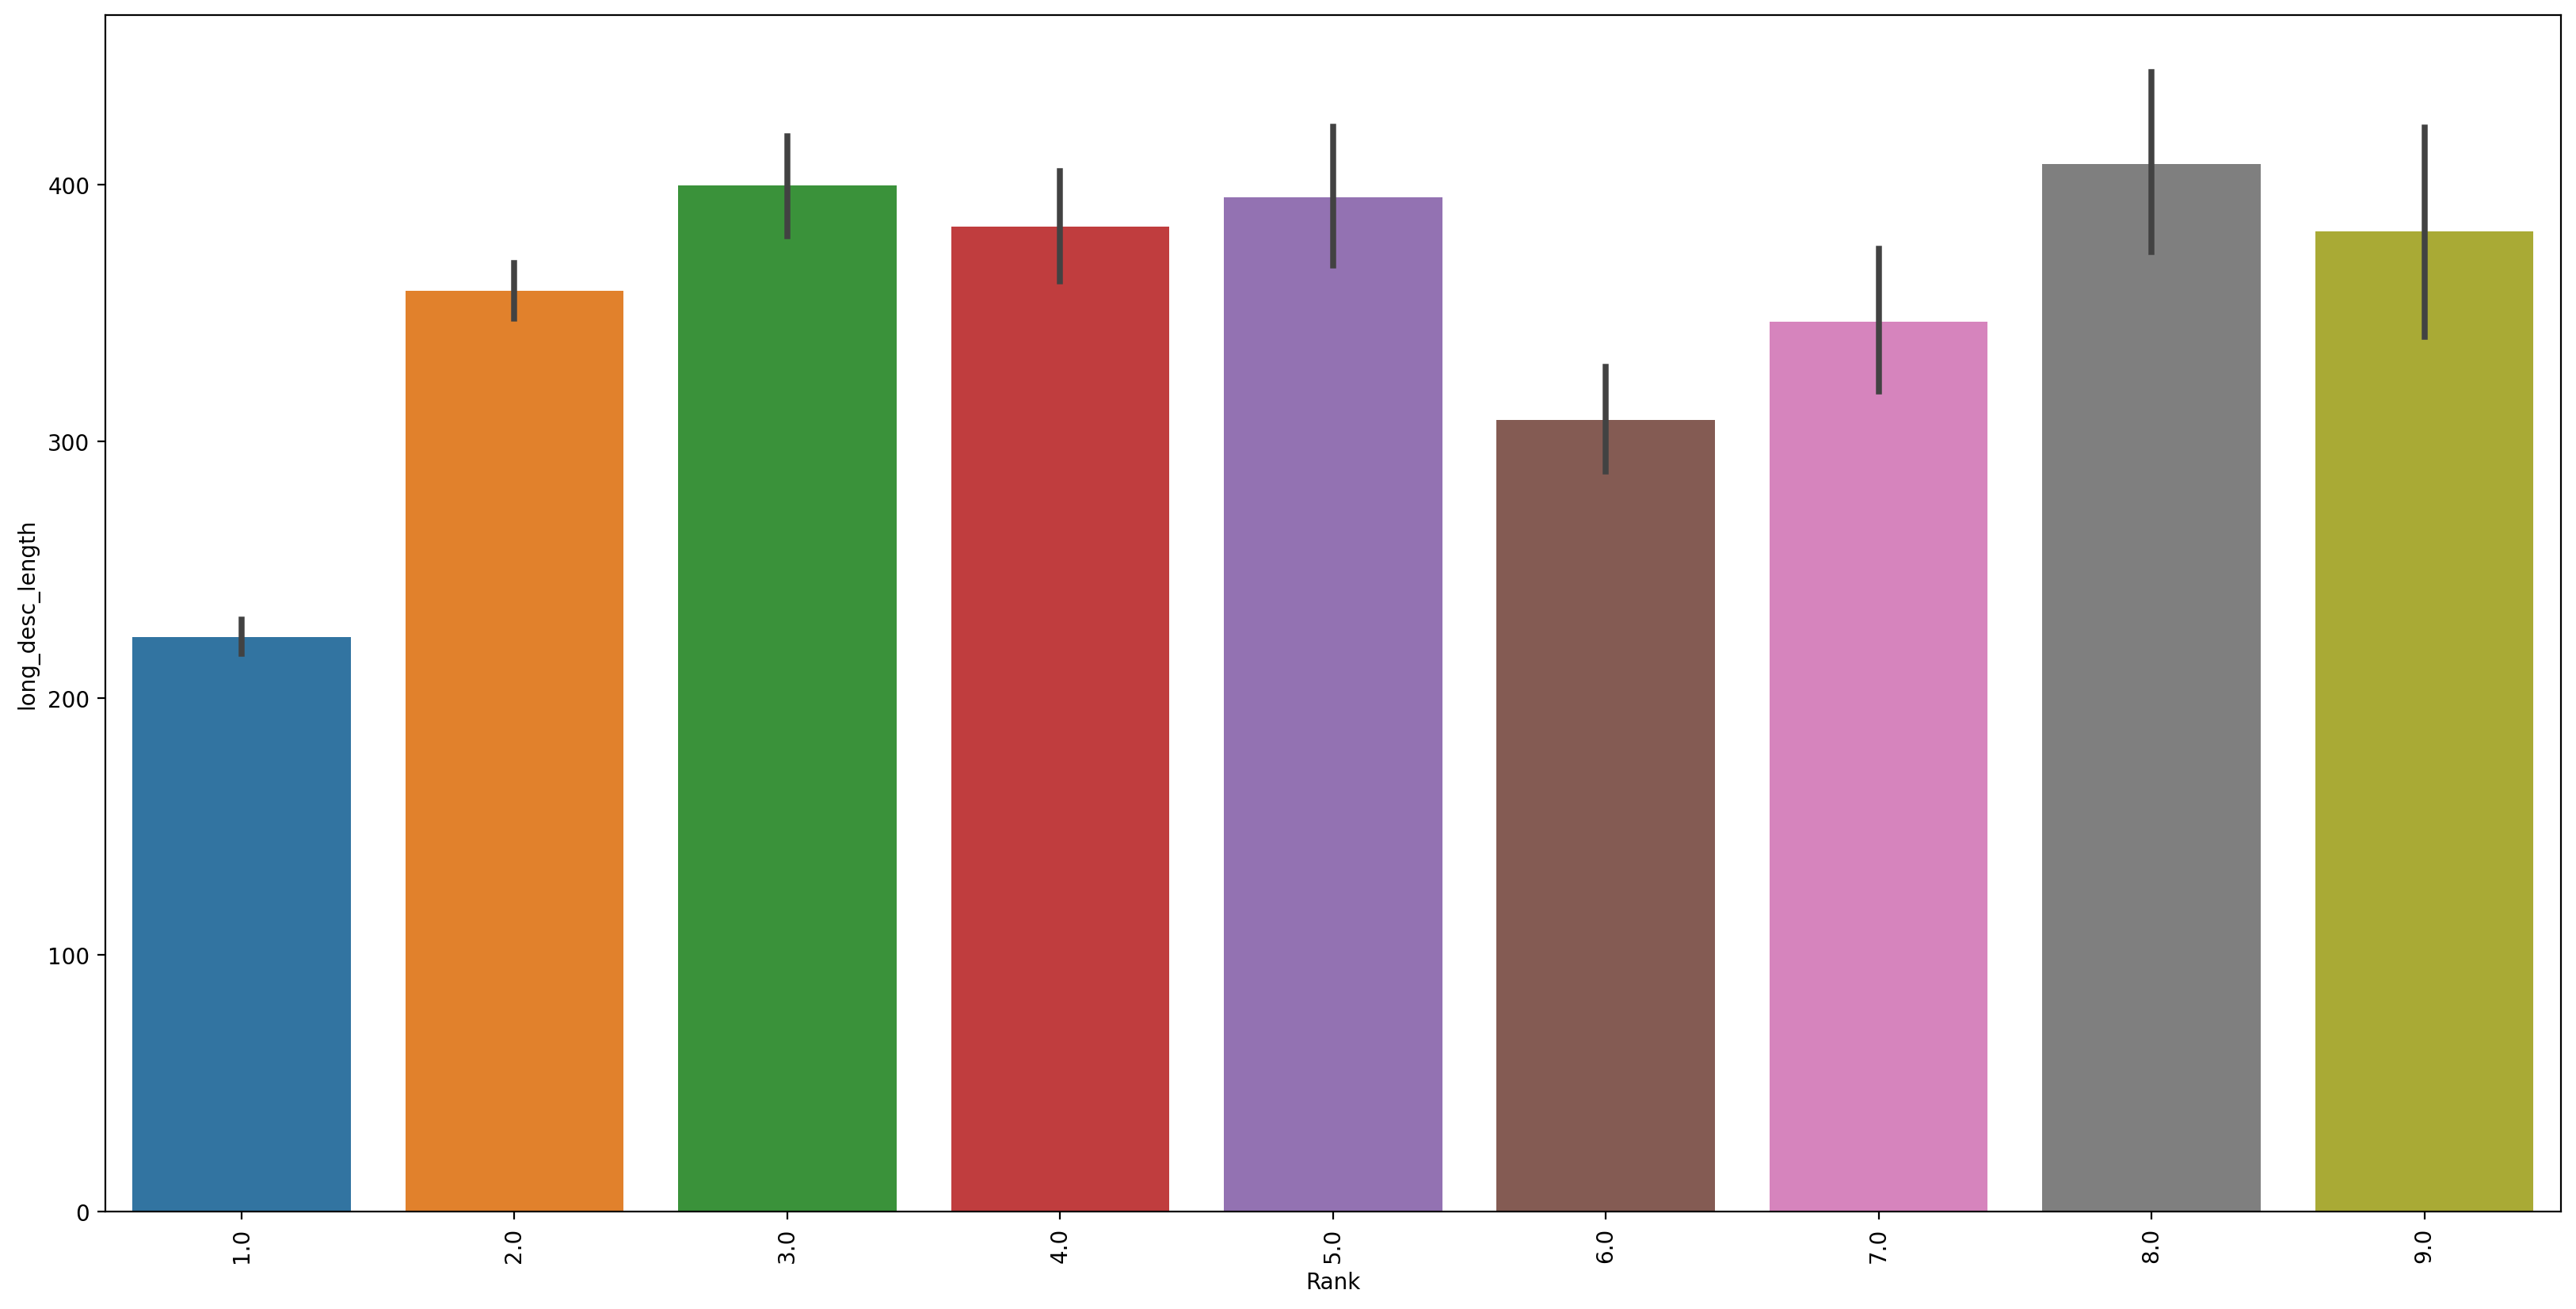

In [12]:
plt.figure(figsize=(20,10),dpi=200)
sns.barplot(x='Rank',y='long_desc_length',estimator=np.mean,data=df[df['Rank']<10])
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

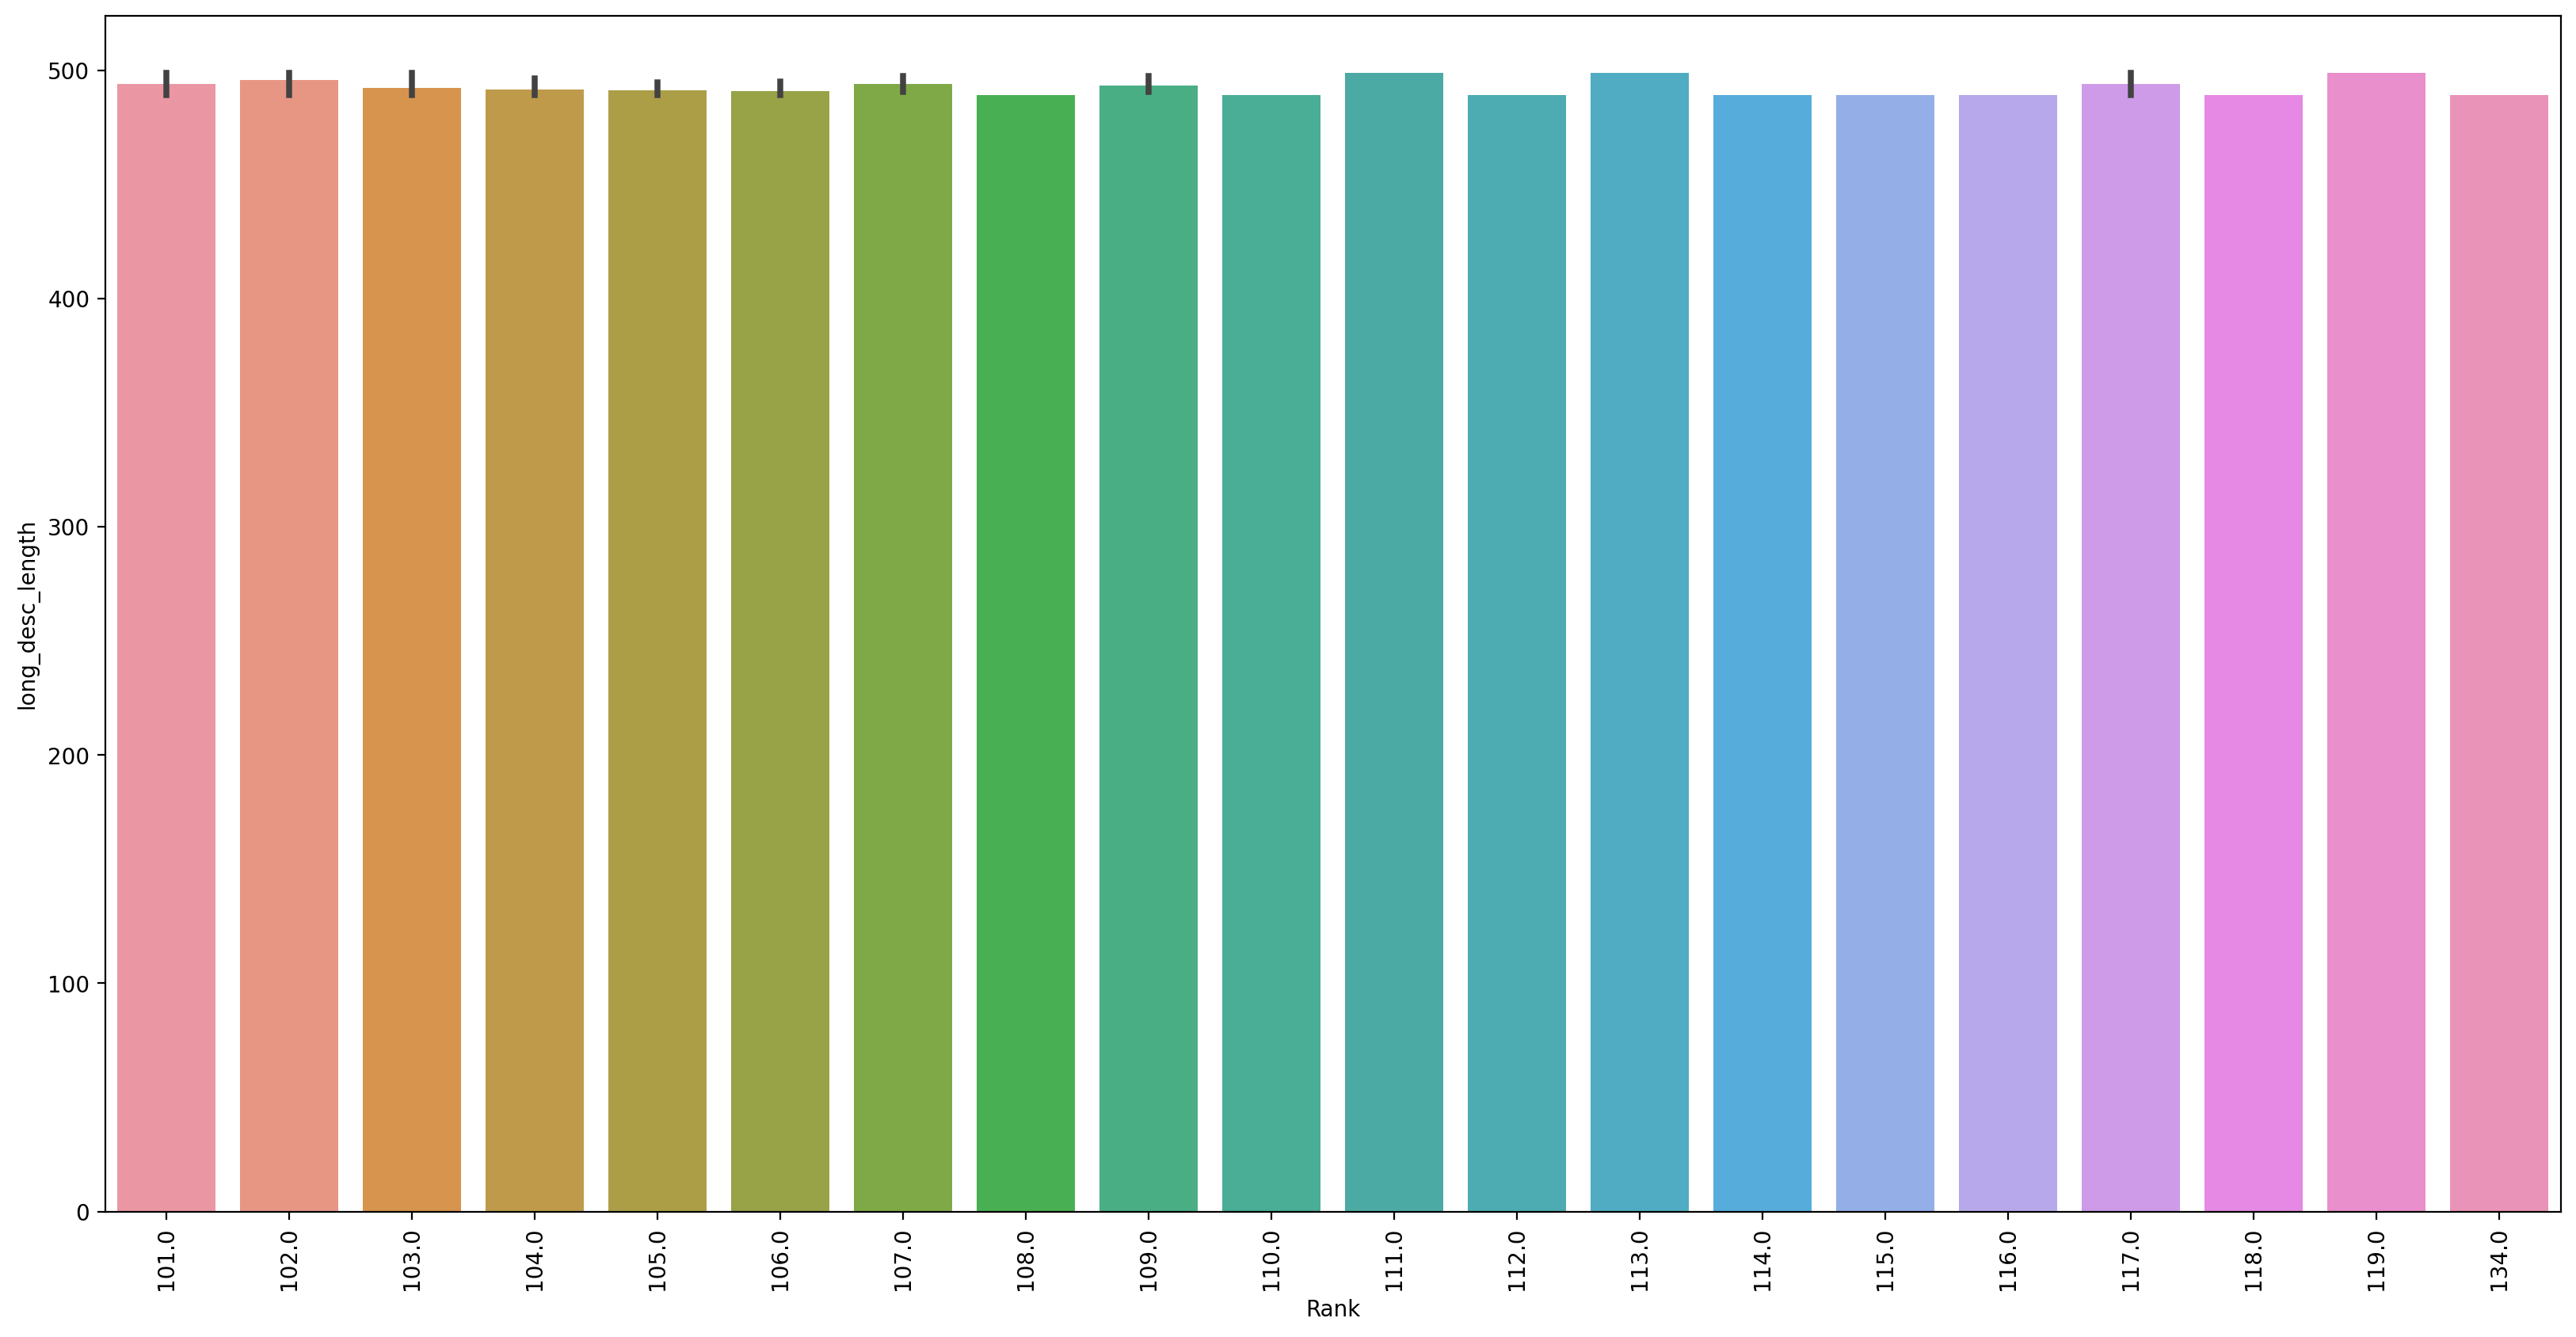

In [14]:
plt.figure(figsize=(20,10),dpi=200)
new_data=df[df['Rank']>100]
sns.barplot(x='Rank',y='long_desc_length',estimator=np.mean,data=new_data)
plt.xticks(rotation= 90)

Inference: Size of long description text does not show much correlation with Rank

EDA 2: Correlation between presence of keyword in first 10 words of Long Description and Rank 

In [16]:
#This block of code creates a new column in the dataframe which indicates whether the keyword is within the first 10 word of long description
df['keyword_present']=range(1,len(df)+1)
for index in df.index:
  word_array=df['Long Description'][index].split()[:10]
  keyword=df['Keyword'][index].lower()
  for word in word_array:
    word=word.lower()
    if keyword in word:
      df['keyword_present'][index]=1
      break
    else:
      df['keyword_present'][index]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


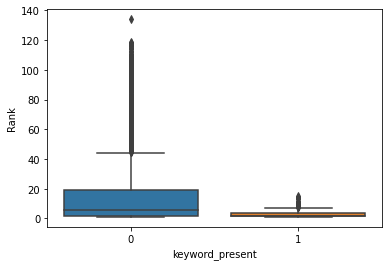

In [17]:
sns.boxplot(x='keyword_present',y='Rank',data=df)

Inference:As the boxplot shows, Top ranked browsers have keyword present within the first 10 words in long description.

EDA 3:Correlation between presence of keyword in Short Description and Rank

In [18]:
#This block of code creates a new column in the dataframe which indicates whether the keyword is within the first 10 word of short description
df['keyword_present_in_short_desc']=range(1,len(df)+1)
for index in df.index:
  word_array=df['Short Description'][index].split()
  keyword=df['Keyword'][index].lower()
  for word in word_array:
    word=word.lower()
    if keyword in word:
      df['keyword_present_in_short_desc'][index]=1
      break
    else:
      df['keyword_present_in_short_desc'][index]=0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


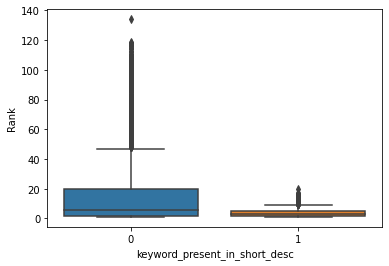

In [19]:
sns.boxplot(x='keyword_present_in_short_desc',y='Rank',data=df)


Inference:As the boxplot shows, Top ranked browsers have keyword present in short description.

EDA 4: Correlation between APP ID and Ranking

In [20]:
df['App ID'].unique() #Getting all unique App IDs

array(['net.fast.web.browser', 'com.android.chrome', 'com.opera.browser',
       'com.cloudmosa.puffinTV', 'com.brave.browser',
       'com.vivaldi.browser', 'com.duckduckgo.mobile.android',
       'com.transsion.phoenix'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

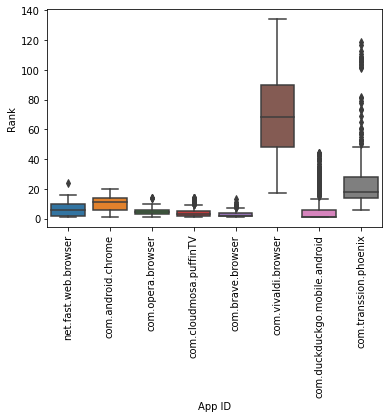

In [21]:
sns.boxplot(x='App ID',y='Rank',data=df)
plt.xticks(rotation=90)

In [22]:
top_browsers=df[df['Rank']<10]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

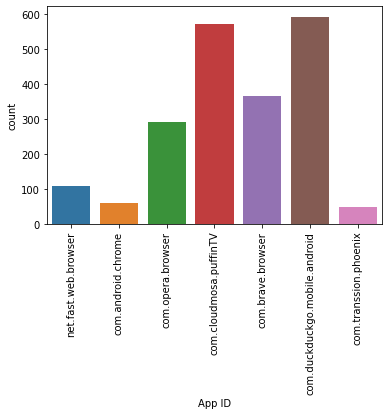

In [23]:
sns.countplot(x='App ID',data=top_browsers)
plt.xticks(rotation=90)

Inference: From Boxplot and Countplot, it is clear that Puffin TV, Brave as well as DuckDuckGo are ranked higher than other browsers. The Vivaldi browser is the worst of all as it is never ranked below 10. 

EDA 5:Keywords that can earn a high ranking

In [24]:
elite_browsers=df[df['Rank']<5]

In [29]:
#rake is a keyword extractor module within nltk package
pip install rake_nltk

     |████████████████████████████████| 1.5 MB 8.3 MB/s 
     |████████████████████████████████| 749 kB 42.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [31]:
import nltk

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
from rake_nltk import Rake
rake = Rake(min_length=2,max_length=3) #Creating Rake model for extracting keyword
keyword_dict={}



In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
#This block of code creates a keyword dictionary with values as no of occurance of keywords within the entire dataset
keyword_dict={}
for index,rows in elite_browsers.iterrows():
  text=rows['Long Description'].lower()
  rake.extract_keywords_from_text(text) 
  keywords_list=rake.get_ranked_phrases()
  for word in keywords_list:
    if word in keyword_dict:
      keyword_dict[word]=keyword_dict[word]+1
    else:
      keyword_dict[word]=1  


In [59]:
keylist = sorted(keyword_dict.items(), key=lambda x:x[1])

In [63]:
keylist[-20:]   #Getting top 20 keywords

[('caught trying', 440),
 ('browsing features', 440),
 ('browsing data', 440),
 ('bookmarks ),', 440),
 ('web browser', 505),
 ('one tap', 514),
 ('personal data', 522),
 ('ad blocker', 530),
 ('private internet browser', 604),
 ('private tabs', 604),
 ('privately browse', 604),
 ('https everywhere', 604),
 ('android today', 604),
 ('g .,', 660),
 ('private browsing', 680),
 ('free built', 680),
 ('internet without', 742),
 ('puffin tv browser', 1210),
 ('android tv', 1320),
 ('https :// duckduckgo', 1320)]

Inference: For getting a good ranking some keywords for browsers include: 
browsing features, 
browsing data, 
bookmarks, 
web browser, 
one tap,
personal data,
ad blocker,
private internet browser,
privately browse,
free built etc 